In [17]:
import numpy as np
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision.transforms import transforms

from src.dataset import get_train_dataloader, get_test_dataloader
from src.models import FCNet

In [3]:
train_transforms = transforms.Compose([
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
])

In [4]:
train_loader = get_train_dataloader(128, transforms=train_transforms)

/home/dalai/repos/mnist_classifier/src/dataset.py:19: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  self.labels = torch.from_numpy(labels).to(torch.long)


In [5]:
test_loader = get_test_dataloader(128, transforms=test_transforms)

In [6]:
model = FCNet()

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

In [8]:
compute_loss = torch.nn.CrossEntropyLoss(reduction='mean')

In [9]:
# Check to use cuda
use_cuda: bool = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

In [10]:
epochs = 30

start_n_iter = 0
start_epoch = 0
# main loop
n_iter = start_n_iter
for epoch in range(epochs):
    model.train()
    
    # use prefetch_generator and tqdm for iterating through data
    pbar = tqdm(enumerate(train_loader),
                total=len(train_loader))
    start_time = time.time()

    # for loop going through dataset
    for i, data in pbar:
        # data preparation
        image, label = data
        if use_cuda:
            image = image.cuda()
            label = label.cuda()

        # keep track of preparation time
        prepare_time = start_time - time.time()

        # forward and backward pass
        out = model(image)
        loss = compute_loss(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute computation time and *compute_efficiency*
        process_time = start_time-time.time()-prepare_time
        compute_efficiency = process_time/(process_time+prepare_time)
        pbar.set_description(
            f'Compute efficiency: {compute_efficiency:.2f}, ' 
            f'loss: {loss.item():.2f},  epoch: {epoch}/{epochs}')
        start_time = time.time()

    # test data every N=1 epochs
    if epoch % 1 == 0:
        model.eval()

        correct = 0
        total = 0
        

        pbar = tqdm(enumerate(test_loader),
                total=len(test_loader)) 
        with torch.no_grad():
            for i, data in pbar:
                # data preparation
                image, label = data
                if use_cuda:
                    image = image.cuda()
                    label = label.cuda()
                
                out = model(image)
                _, predicted = torch.max(out.data, 1)
                total += label.size(0)
                correct += (predicted == label).sum().item()

        print(f'Accuracy on test set: {100*correct/total:.2f}')


  0%|          | 0/469 [00:00<?, ?it/s]

/home/dalai/repos/mnist_classifier/src/models.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 83.19


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 88.78


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 90.81


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 91.94


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 92.76


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 93.30


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 93.76


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 94.21


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 94.38


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 94.61


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 94.76


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 94.88


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.19


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.24


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.35


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.49


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.48


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.67


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.54


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.81


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.91


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.83


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.88


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 96.01


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.94


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.95


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 95.97


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 96.02


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 96.01


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy on test set: 96.06


In [50]:
images, labels = next(iter(test_loader))
if use_cuda:
    images = images.cuda()
predictions = model(images).cpu()

/home/dalai/repos/mnist_classifier/src/models.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


In [16]:
predictions[0]

tensor([-1.3869e+01, -1.3869e+01, -1.3869e+01, -1.0236e+01, -1.3869e+01,
        -1.3869e+01, -1.3869e+01, -4.8398e-05, -1.3869e+01, -1.2058e+01],
       device='cuda:0', grad_fn=<SelectBackward0>)

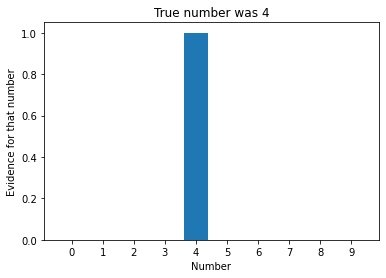

In [51]:
plt.bar(range(10),torch.exp(predictions[85].detach())) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %labels[85].item())
plt.show()

In [52]:
errors = np.where( torch.max(predictions,axis=1)[1] != labels )[0]
print(errors)

[ 61  63 104 115 125]


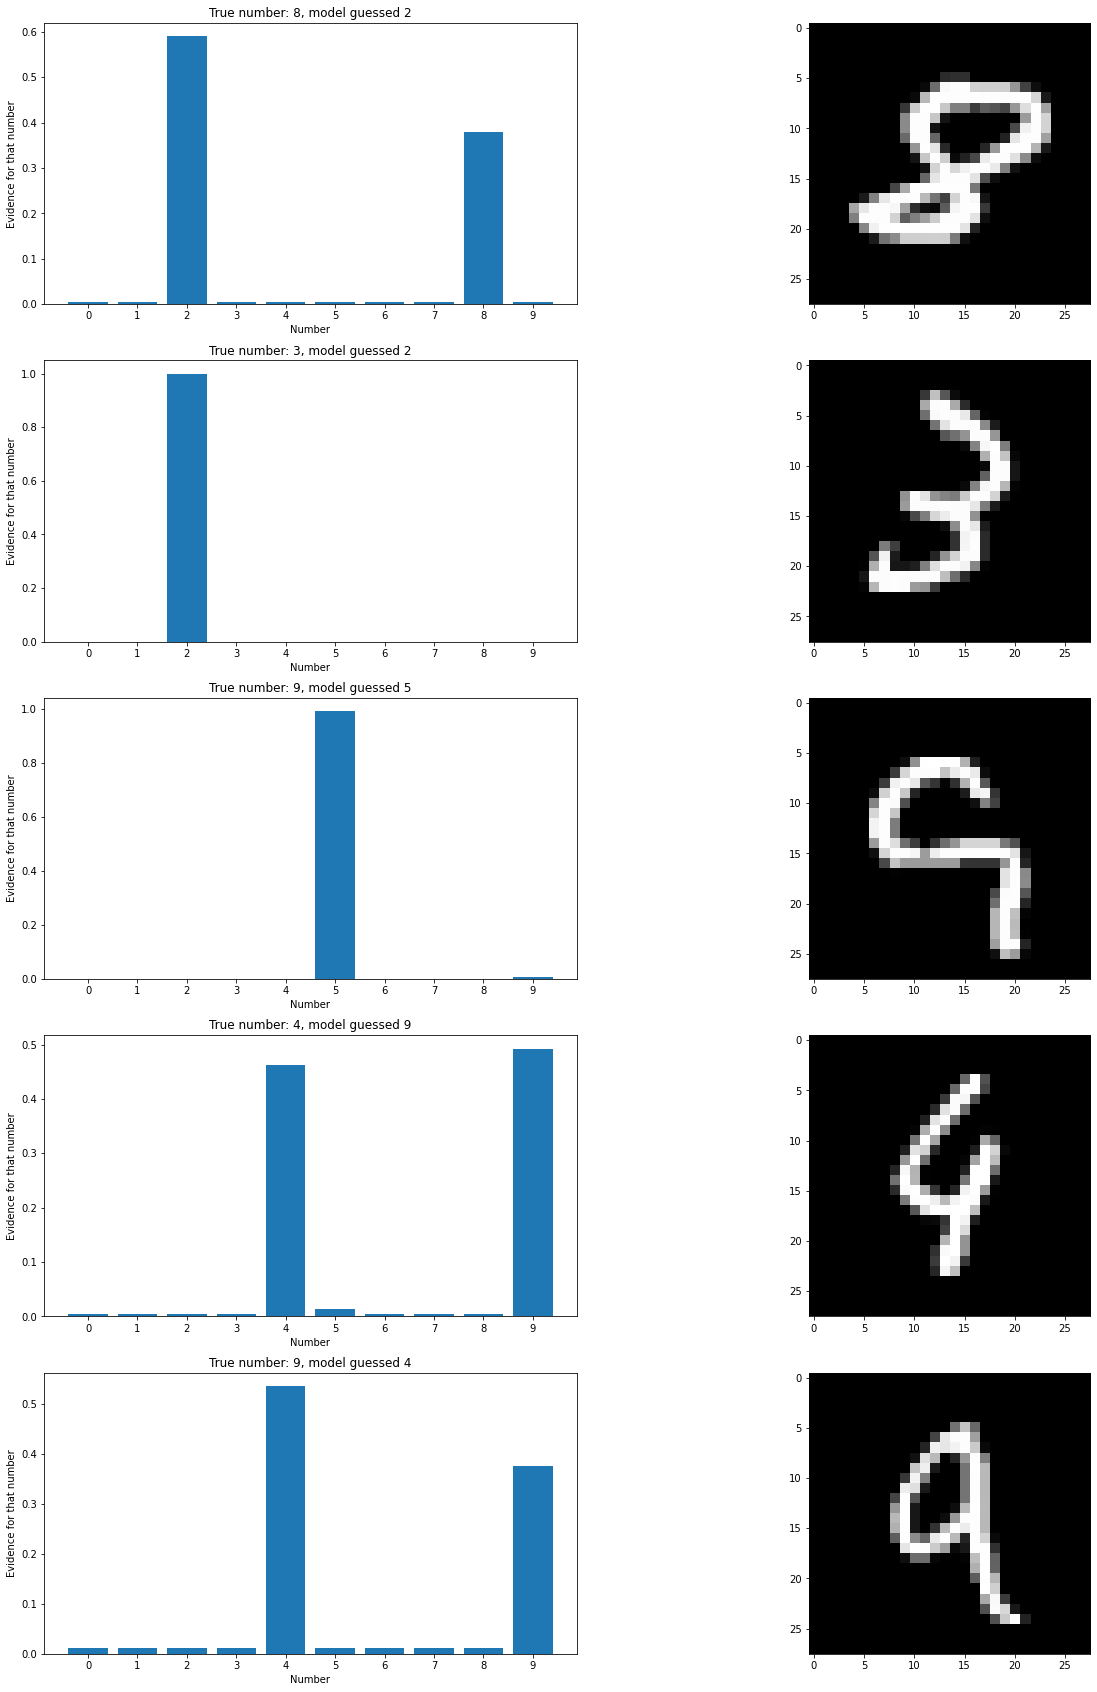

In [53]:
# Evidence for all numbers from one sample
fig,ax = plt.subplots(len(errors), 2, figsize=(21,30))

for i, error in enumerate(errors):
    ax[i][0].bar(range(10),np.exp(predictions[errors[i]].detach()))
    ax[i][0].set_xticks(range(10))
    ax[i][0].set_xlabel('Number')
    ax[i][0].set_ylabel('Evidence for that number')
    ax[i][0].set_title('True number: %s, model guessed %s' 
                    %(labels[errors[i]].item(), torch.argmax(predictions[errors[i]]).item()))

    ax[i][1].imshow( np.reshape(images[errors[i],:].cpu(), (28,28)) ,cmap='gray')

plt.show()